# OCT volumes for glaucoma detection
Creators

    Ishikawa, Hiroshi

#### Description

OCT volumes used for the training and evaluation of a glaucoma detection classifier as described in

A feature agnostic approach for glaucoma detection in OCT volumes
https://arxiv.org/abs/1807.04855

Volumes are in NumPy format. A viewer is available at https://github.com/maet3608/oct-viewer


In [1]:
import data_load

data_loader = data_load.DataLoader()
# image_data, np_array_data, labels_data = data_loader.retina()
np_array_data, labels_data, patient_id, eye_side = data_loader.retina_npy()


In [2]:
# generate cross-validation folds
cv_split = data_loader.retina_npy_split(np_array_data, labels_data, patient_id, 10,True,42)

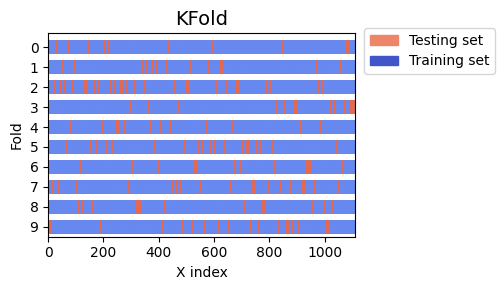

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 3))
data_loader.plot_kfold(cv_split, ax)
plt.tight_layout()
fig.subplots_adjust(right=0.6)